In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [40]:
# Load the dataset
data = pd.read_csv('fraudTest.csv')

In [41]:
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [42]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [43]:
data['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [44]:

X = data.drop('is_fraud', axis=1)  
y = data['is_fraud']  


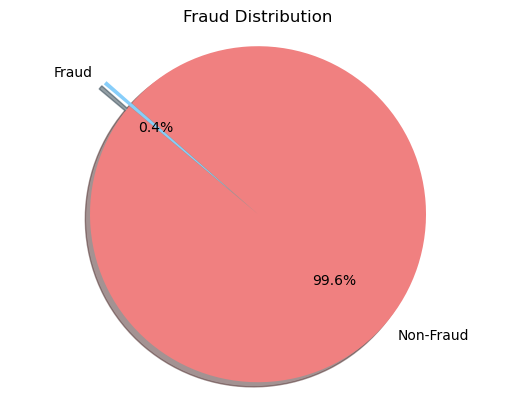

In [45]:
import matplotlib.pyplot as plt


fraud_counts = y.value_counts()

# Create a pie chart
labels = ['Non-Fraud', 'Fraud']
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.2)  

plt.pie(fraud_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Fraud Distribution')
plt.show()


/var/folders/2k/3j3xld952hg619h5p4nhqwqh0000gn/T/ipykernel_95899/1271507417.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


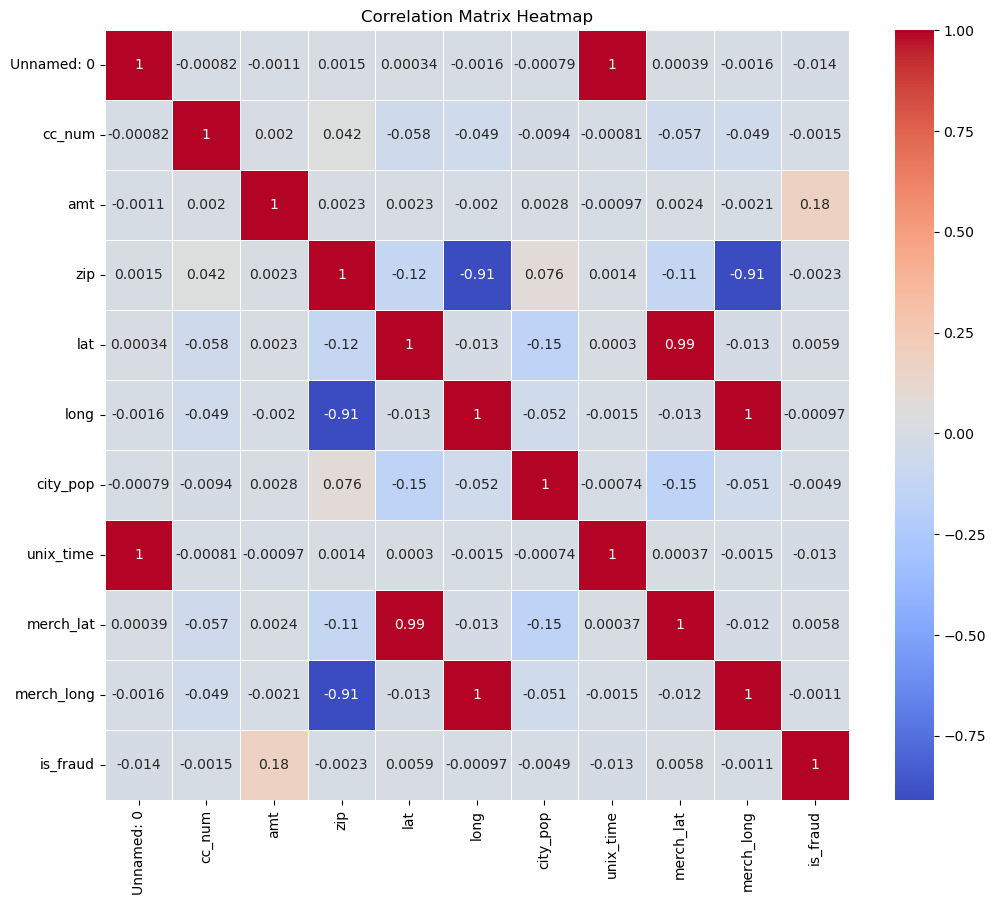

In [46]:
import seaborn as sns

# Assuming 'data' contains your dataset
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [47]:

# Convert 'trans_date_trans_time' to numeric
data['trans_date_trans_time'] = pd.to_numeric(pd.to_datetime(data['trans_date_trans_time']))

# Convert 'dob' (date of birth) to numeric if needed
data['dob'] = pd.to_numeric(pd.to_datetime(data['dob']))

# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'trans_num'], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']  # Target variable



In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, classification_rep



In [55]:
# Logistic Regression
lr_model = LogisticRegression()
lr_accuracy, lr_conf_matrix, lr_classification_rep = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)


#  results

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("Logistic Regression Confusion Matrix:\n", lr_conf_matrix)
print("Logistic Regression Classification Report:\n", lr_classification_rep)



Logistic Regression Accuracy: 99.58%
Logistic Regression Confusion Matrix:
 [[110682     36]
 [   426      0]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [56]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_accuracy, dt_conf_matrix, dt_classification_rep = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)
print("Decision Tree Classification Report:\n", dt_classification_rep)


Decision Tree Accuracy: 99.60%
Decision Tree Confusion Matrix:
 [[110483    235]
 [   212    214]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.48      0.50      0.49       426

    accuracy                           1.00    111144
   macro avg       0.74      0.75      0.74    111144
weighted avg       1.00      1.00      1.00    111144



In [57]:
# Random Forest
rf_model = RandomForestClassifier()
rf_accuracy, rf_conf_matrix, rf_classification_rep = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)


print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classification Report:\n", rf_classification_rep)



Random Forest Accuracy: 99.81%
Random Forest Confusion Matrix:
 [[110690     28]
 [   187    239]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.90      0.56      0.69       426

    accuracy                           1.00    111144
   macro avg       0.95      0.78      0.84    111144
weighted avg       1.00      1.00      1.00    111144

